In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def minimos_cuadrados_incertidumbre(x,y,t,i,name="Regresion",plot = True,Descargar= False, ):
    w = 1/(i**2)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_y = np.sum(w*y)
    sum_w_x = np.sum(w*x)
    sum_w_x_y = np.sum(w*x*y)
    sum_w = np.sum(w)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    pendiente = ((sum_w*sum_w_x_y)-(sum_w_x*sum_w_y))/delta_prima
    intercepto = ((sum_w_x_2*sum_w_y)-(sum_w_x*sum_w_x_y))/delta_prima
    error_inter = np.sqrt(sum_w_x_2/delta_prima)
    error_m = np.sqrt(sum_w/delta_prima)
    residuales = y-(pendiente*x+intercepto)
    normalize_residuales = (y-(pendiente*x+intercepto))/i
    
    
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})
        axs[0].errorbar(x, y,xerr=t, yerr=i, fmt=' ', label = "Datos", capsize=2, elinewidth=1,markeredgewidth=1, capthick=0.5)       
        axs[0].plot(x,pendiente*x+intercepto, label = "Regresión lineal", linestyle='--', color= "Black")
        axs[1].scatter(x,residuales)
        axs[2].scatter(x,normalize_residuales)
        axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[0].set_ylabel("Voltaje [mV]\n")
        axs[1].set_ylabel('Residuales [mV]\n')
        axs[2].set_ylabel('Residuales\n Normalizados [mV]')
        plt.xlabel('Angulo [rad]')
        axs[0].legend()
        plt.tight_layout()
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    print("pendiente = ", pendiente , " +/- ", error_m)
    print("Intercepto = ", intercepto , " +/- ", error_inter)
    print("D: ", Durbin_Watson(normalize_residuales))
    return pendiente,intercepto, error_inter, error_m, normalize_residuales


def minimos_cuadrados_incertidumbre_2(x,y,t,i,palabras,name="Regresion",plot = True,Descargar= False):
    w = 1/(i**2)
    sum_w_x_2 = np.sum((x**2)*w)
    sum_w_y = np.sum(w*y)
    sum_w_x = np.sum(w*x)
    sum_w_x_y = np.sum(w*x*y)
    sum_w = np.sum(w)
    delta_prima = (sum_w*sum_w_x_2)-(sum_w_x)**2 
    pendiente = ((sum_w*sum_w_x_y)-(sum_w_x*sum_w_y))/delta_prima
    intercepto = ((sum_w_x_2*sum_w_y)-(sum_w_x*sum_w_x_y))/delta_prima
    error_inter = np.sqrt(sum_w_x_2/delta_prima)
    error_m = np.sqrt(sum_w/delta_prima)
    residuales = y-(pendiente*x+intercepto)
    normalize_residuales = (y-(pendiente*x+intercepto))/i
    
    x_ = np.linspace(min(x),max(x),100)
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})
        axs[0].errorbar(x, y,xerr=t, yerr=i,fmt=" ", markersize = 2,label = "Datos", capsize=2, elinewidth=1,markeredgewidth=1, capthick=0.5)       
        axs[0].plot(x_,pendiente*x_+intercepto, label = "Regresión lineal", linestyle='--', color= "Black")
        axs[1].scatter(x,residuales, s= 4)
        axs[2].scatter(x,normalize_residuales, s = 4)
        axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
        axs[0].set_ylabel(palabras[0]+" \n")
        axs[1].set_ylabel('Residuales '+ palabras[1] + "\n" )
        axs[2].set_ylabel('Residuales\n Normalizados ' + palabras[1])
        plt.xlabel(palabras[2])
        axs[0].legend()
        axs[0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axs[0].yaxis.get_offset_text().set_visible(True) 
        axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axs[1].yaxis.get_offset_text().set_visible(True) 
        axs[2].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axs[2].yaxis.get_offset_text().set_visible(True) 
        plt.tight_layout()
        if Descargar:
            ruta = os.getcwd()
            name =name+".png"
            ruta_completa = f"{ruta}/{name}"
            plt.savefig(ruta_completa, bbox_inches='tight', pad_inches=1.0)
    print("pendiente = ", pendiente , " +/- ", error_m)
    print("Intercepto = ", intercepto , " +/- ", error_inter)
    print("D: ", Durbin_Watson(normalize_residuales))
    return pendiente,intercepto, error_inter, error_m, normalize_residuales

def Durbin_Watson(R):
    a_1 = R[1:]
    a_2 = R[:-1]
    a = (a_1-a_2)**2
    num = np.sum(a)
    dem = np.sum(R**2)
    D = num/dem
    return D


def lag_plot1(R):
    plt.scatter(R[:-1],R[1:])
    plt.ylabel("Residuales Normalizados (i)")
    plt.xlabel("Residuales Normalizados (i-k)")
    

def lag_plot(R, R1):
    plt.scatter(R[:-1],R[1:], label = "Sentido Horario")
    plt.scatter(R1[:-1],R1[1:], label = "Sentido Anti-Horario")
    plt.ylabel("Residuales Normalizados (i)")
    plt.xlabel("Residuales Normalizados (i-k)")
    plt.legend()
    
    
def lag_plot_2(R, R1):
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
    axs[0].scatter(R[:-1],R[1:])
    axs[0].set_ylabel("Residuales Normalizados (i)")
    axs[0].set_xlabel("Residuales Normalizados (i-k)")
    axs[1].set_xlabel("Residuales Normalizados (i-k)")
    axs[1].scatter(R1[:-1],R1[1:])

Calibración
Con valores de 3.0

Vpp = 400[mV]

pendiente =  2104.57142857143  +/-  1.1952286093343938
Intercepto =  147.73333333333326  +/-  0.46547466812563143
D:  2.0790298550032458
-0.07019639786406003


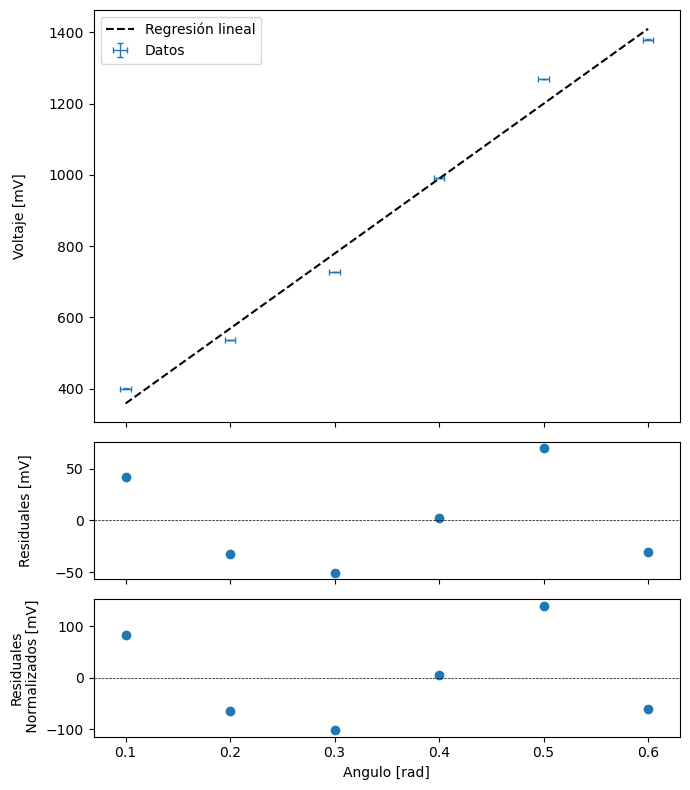

In [3]:
rad = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
Vpp = np.array([400, 536, 728, 992, 1270, 1380])

m, b, e_b, e_m, R =minimos_cuadrados_incertidumbre(rad, Vpp, 0.005*np.ones(len(rad)),0.5*np.ones(len(rad)) )

int_x = -b/m
print(int_x)

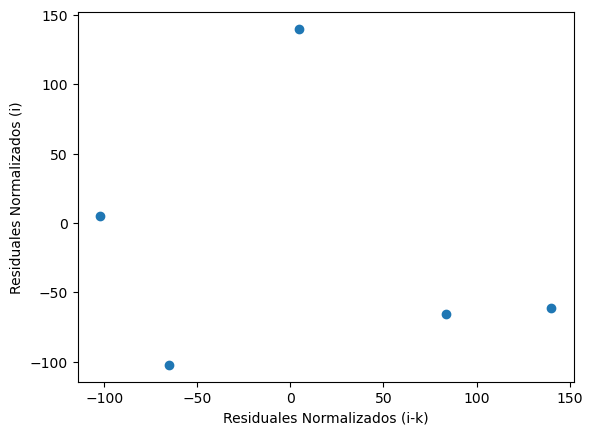

In [4]:
lag_plot1(R)

# 1 Datos

Masa en cada uno 150 , 2.43 rad
200 -> 2.3

250 = 2.18

300 -> 2.08

50 = 2.78

100 = 2.62

____

50 -> 3.2

100 -> 3.39

150 ->3.53

200 -> 2.67

250 -> 3.8

300 -> 3.89


pendiente =  -0.07539759068655792  +/-  0.00028913486094134754
Intercepto =  -0.006069470066689746  +/-  0.00019120726232530513
D:  1.0899416827240558


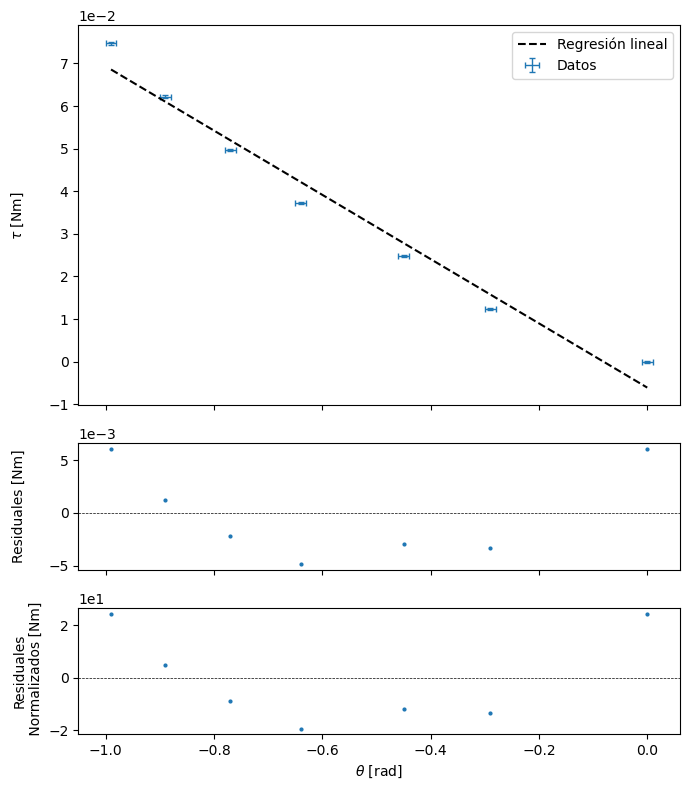

In [5]:
T = np.array([0,50,100, 150, 200, 250, 300])*9.8*12.7*2*10**-6
rad = np.array([3.07, 2.78, 2.62, 2.43, 2.3, 2.18, 2.08])-0.07-3
t= e_p = 12.7*9.8*np.ones(len(T))*2*10**-6
i = e_r = np.ones(len(rad))*0.01

palabras = [r"$\tau$ [Nm]", "[Nm]", r"$\theta$ [rad]"]


m_n, b, e_b, e_m, R =minimos_cuadrados_incertidumbre_2(rad, T, i,t , palabras)

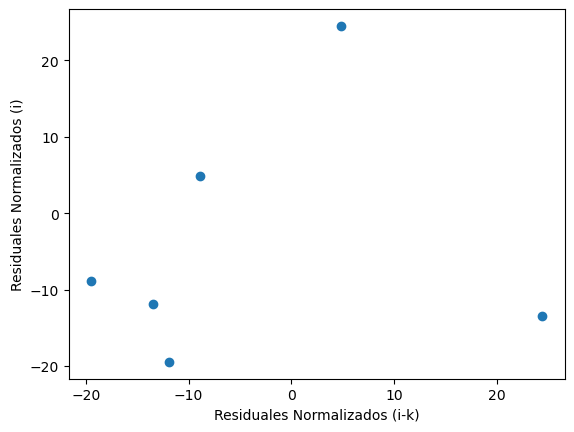

In [6]:
lag_plot1(R)

pendiente =  0.08779494603304518  +/-  0.00033306695083542903
Intercepto =  -0.0010409335515883175  +/-  0.00017335029788903978
D:  1.2716314685581478


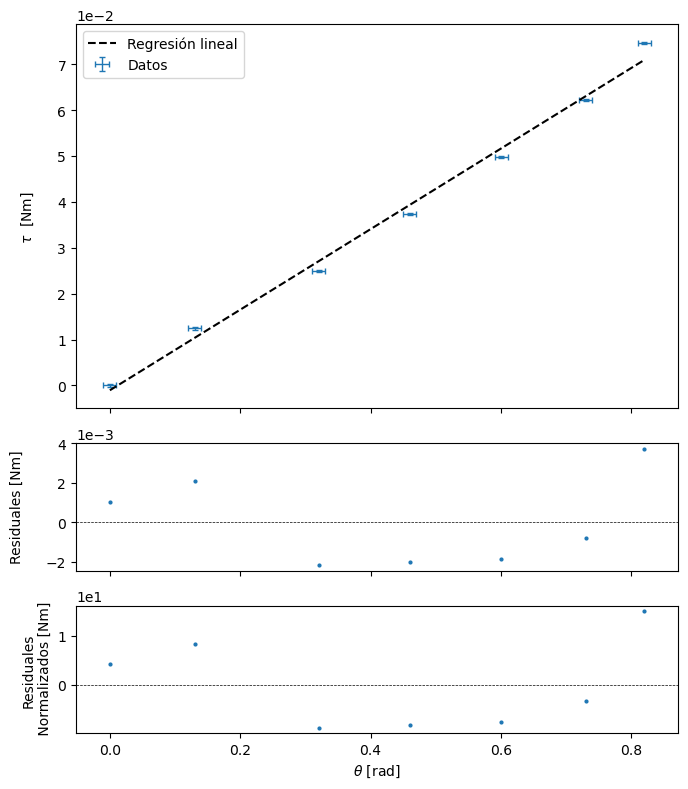

In [7]:
T1 = np.array([0,50,100, 150, 200, 250, 300])*9.8*12.7*2*10**-6
rad1= np.array([3.07,  3.2, 3.39, 3.53, 3.67, 3.8, 3.89])-0.07-3
e_p1 = 12.7*9.8*np.ones(len(T))*2*10**-6
e_r1 = np.ones(len(rad1))*0.01

palabras = [r"$\tau$  [Nm]", "[Nm]", r"$\theta$ [rad]"]


m_p, b1, e_b1, e_m1, R_1 =minimos_cuadrados_incertidumbre_2(rad1, T1,e_r1,e_p1 , palabras)

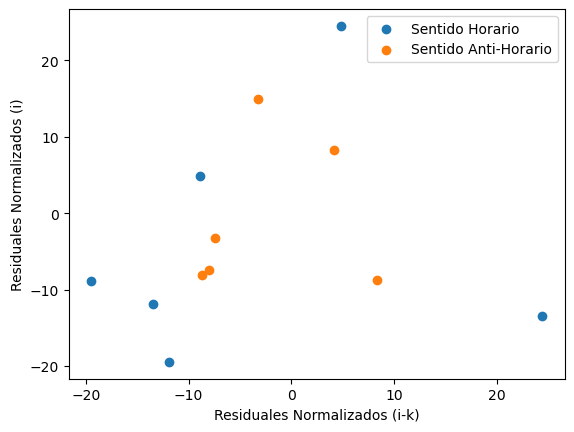

In [8]:
lag_plot(R, R_1)

# Ajuste

pendiente =  -0.07558774306534374  +/-  0.0001125621444634579
Intercepto =  -0.00523715076952738  +/-  6.698224540103242e-05
D:  0.7627317272170696


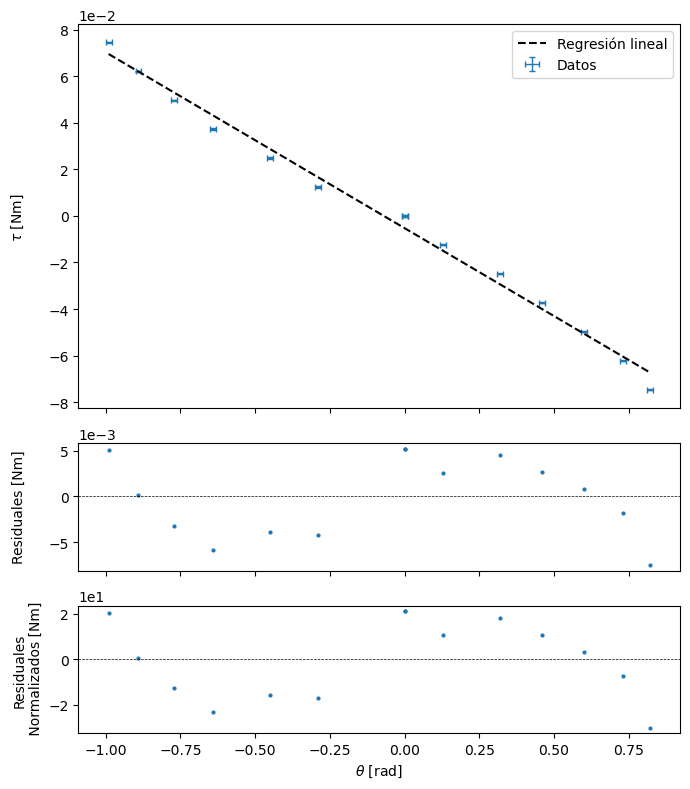

In [9]:
T = np.array([0,50,100, 150, 200, 250, 300])*9.8*12.7*2*10**-6
rad = np.array([3.07, 2.78, 2.62, 2.43, 2.3, 2.18, 2.08])-0.07-3


angulo = np.concatenate((rad,rad1))
torque = np.concatenate((T, -T1))


t= e_p = 12.7*9.8*np.ones(len(torque))*2*10**-6
i = e_r = np.ones(len(angulo))*0.01




palabras = [r"$\tau$ [Nm]", "[Nm]", r"$\theta$ [rad]"]


m, b, e_b, e_m, R =minimos_cuadrados_incertidumbre_2(angulo, torque, i,t , palabras)

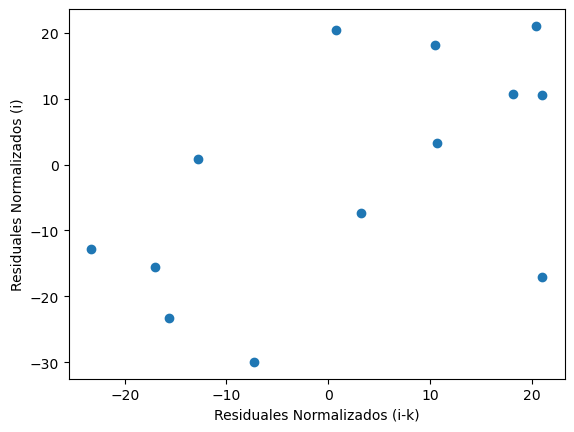

In [10]:
lag_plot1(R)

# 2 datos 


pendiente =  0.541978021978022  +/-  0.014824986333222025
Intercepto =  -0.06923076923076905  +/-  0.01386750490563073
D:  0.6454646427587878


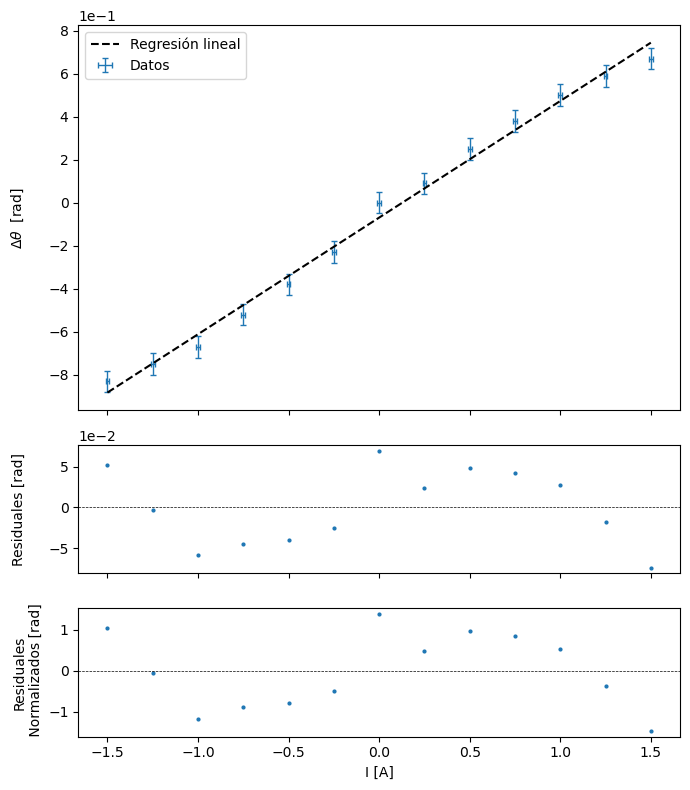

In [11]:
I = np.array([0,0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2 ])
I_ = -np.array([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2 ])
theta = np.array([3.07,3.16, 3.32, 3.45, 3.57, 3.66, 3.74, 3.8, 3.88])-3.07
theta_ = np.array([2.84, 2.69, 2.55, 2.4, 2.32, 2.24, 2.18, 2.11])-3.07

n = 2
i = np.concatenate((I[:-n], I_[:-n]))

t = np.concatenate((theta[:-n], theta_[:-n]))



palabras = [r"$\Delta \theta$  [rad]", "[rad]", "I [A]"]


m__, b1, e_b1, e_m1, R_1 =minimos_cuadrados_incertidumbre_2(i, t,0.01*np.ones(len(i)),0.05*np.ones(len(i)) , palabras)


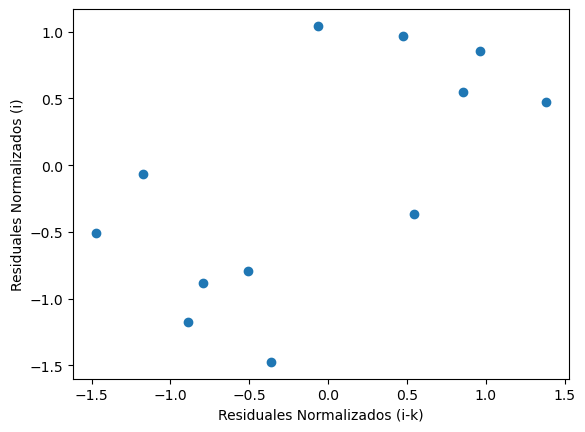

In [12]:
lag_plot1(R_1)

In [14]:
val = m/(3234*10**-6)*m__
print(val)

-12.667561988972777


In [15]:
val = m_n/(3234*10**-6)*m__
print(val)

val = m_p/(3234*10**-6)*m__
print(val)
prom = (-m_p+m_n)/2


val = prom/(3234*10**-6)*m__
print(val)

-12.635694824430798
14.71333679364781
-13.674515809039304


In [16]:
# 2.4 cm 1 datos 0.6
# 2.6 datso 0.2
# 2.6

[ 0.75484688  0.61830618  5.4048495   5.79318533 -0.09882769]
Parámetros ajustados:
V = 0.7548468790211955 ± 0.00156734078847102
gamma = 1.2366123666121922 ± 0.002108270193334179
w = 5.404849500187926 ± 0.002403437871380108
c = 5.7931853278972145 ± 0.0026629137687021074
d = -0.0988276940788874 ± 0.0004052176866305696
tau =  0.8086608439308977
Q =  4.399196796970399


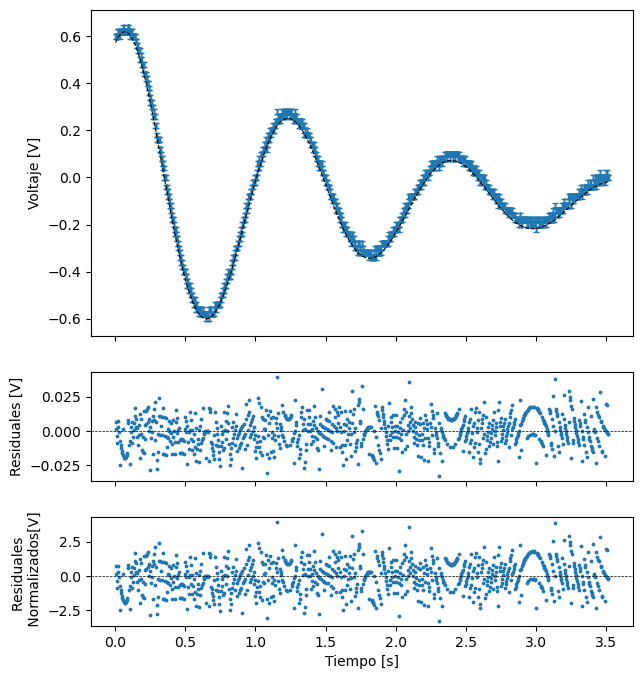

In [17]:
# Leer el archivo CSV

def ajuste(x, V, b, w,c,d):
    return V * np.exp(-b*x) * np.cos(w * x+c)+d


df = pd.read_csv('F0000CH1.csv')

# Extraer las columnas 4 y 5 (ten en cuenta que las columnas en pandas se indexan desde 0)
N = 1620
t = df.iloc[:, 3].to_numpy()[:-N]  # columna 4
V = df.iloc[:, 4].to_numpy()[:-N]  # columna 5
res_1, con_1 = curve_fit(ajuste, t, V, p0=[10, 5,5,5,0.1])
print(res_1)
yi=ajuste(t, *res_1)






perr = np.sqrt(np.diag(con_1))  # Las desviaciones estándar de los parámetros

# Imprimir los resultados
print("Parámetros ajustados:")
print(f"V = {res_1[0]} ± {perr[0]}")
print(f"gamma = {2*res_1[1]} ± {perr[1]}")
print(f"w = {res_1[2]} ± {perr[2]}")
print(f"c = {res_1[3]} ± {perr[3]}")
print(f"d = {res_1[4]} ± {perr[4]}")

fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})

axs[0].errorbar(t, V-V[-1],xerr=0.001, yerr=0.01,fmt=" ", markersize = 2,label = "Datos", capsize=2, elinewidth=1,markeredgewidth=1, capthick=0.5)
axs[0].plot(t,yi, linestyle = "--", color= "black", linewidth=0.8 )
plt.xlabel("Tiempo [s]")
axs[0].set_ylabel("Voltaje [V]")
axs[1].set_ylabel("Residuales [V]")
axs[1].scatter(t, V-yi, s = 3)
R =(V-yi)/0.01
axs[2].scatter(t,R , s = 3)
axs[2].set_ylabel("Residuales \n Normalizados[V]")
print("tau = ", 1/(res_1[1]*2))
print("Q = ", (res_1[2]**2+res_1[1]**2)**0.5/(2*res_1[1]) )
axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)

n = 0.97

1.7821321612049636

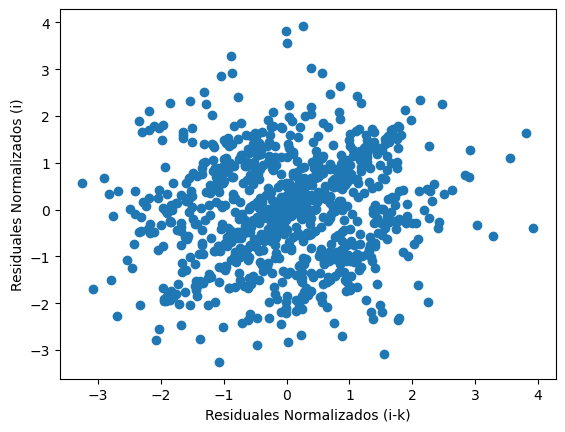

In [18]:
lag_plot1(R)
Durbin_Watson(R)

[-0.72542721  0.06903865  5.43433159  6.93385976 -0.10084438]
Parámetros ajustados:
V = -0.725427207608296 ± 0.001304811991527356
gamma = 0.13807730005814148 ± 0.0004132873267547579
w = 5.434331586731958 ± 0.0004034054795317514
c = 6.933859756763908 ± 0.001712174127997288
d = -0.10084437735125662 ± 0.00039031830411886617
tau =  7.242320059697871
Q =  39.360344574973794


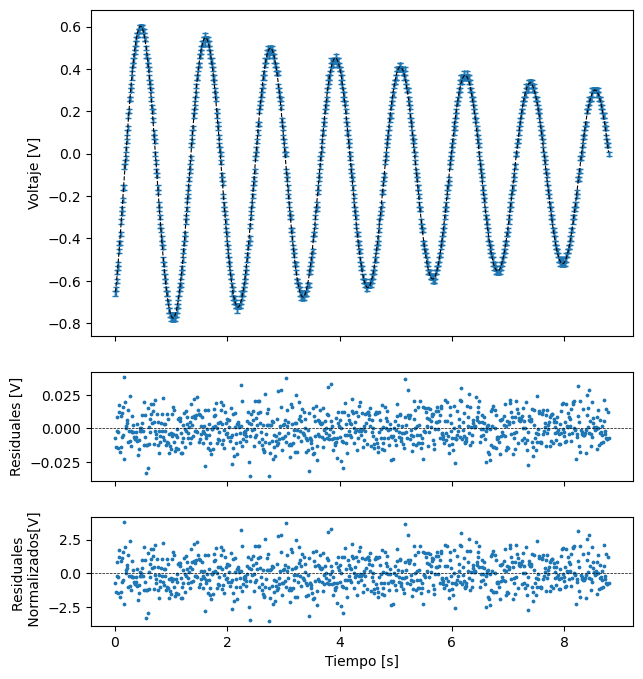

In [19]:
df = pd.read_csv('F0001CH1.csv')

# Extraer las columnas 4 y 5 (ten en cuenta que las columnas en pandas se indexan desde 0)
N = 1620
t = df.iloc[:, 3].to_numpy()[:-N]  # columna 4
V = df.iloc[:, 4].to_numpy()[:-N]  # columna 5
res_1, con_1 = curve_fit(ajuste, t, V, p0=[10, 5,5,5,1])
print(res_1)
yi=ajuste(t, *res_1)


perr = np.sqrt(np.diag(con_1))  # Las desviaciones estándar de los parámetros

# Imprimir los resultados
print("Parámetros ajustados:")
print(f"V = {res_1[0]} ± {perr[0]}")
print(f"gamma = {2*res_1[1]} ± {perr[1]}")
print(f"w = {res_1[2]} ± {perr[2]}")
print(f"c = {res_1[3]} ± {perr[3]}")
print(f"d = {res_1[4]} ± {perr[4]}")

fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})

axs[0].errorbar(t, V-V[-1],xerr=0.001, yerr=0.01,fmt=" ", markersize = 2,label = "Datos", capsize=2, elinewidth=1,markeredgewidth=1, capthick=0.5)
axs[0].plot(t,yi, linestyle = "--", color= "black", linewidth=0.8 )
plt.xlabel("Tiempo [s]")
axs[0].set_ylabel("Voltaje [V]")
axs[1].set_ylabel("Residuales [V]")
axs[1].scatter(t, V-yi, s = 3)
R =(V-yi)/0.01
axs[2].scatter(t,R , s = 3)
axs[2].set_ylabel("Residuales \n Normalizados[V]")
axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
print("tau = ", 1/(res_1[1]*2))
print("Q = ", (res_1[2]**2+res_1[1]**2)**0.5/(2*res_1[1]) )

n = 8.7

1.9279902352853513

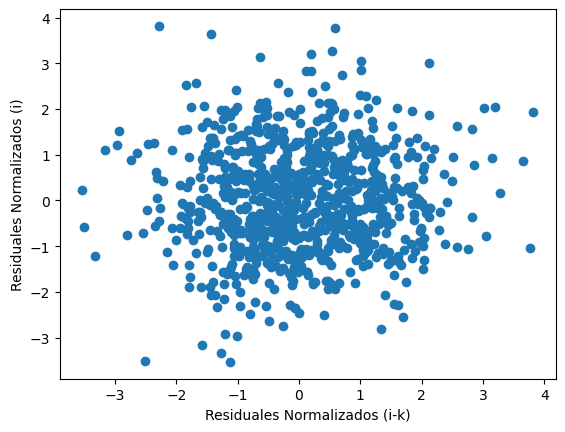

In [20]:
lag_plot1(R)
Durbin_Watson(R)

[ 1.06322355  0.43429846  5.42347457  5.38528844 -0.10060926]
Parámetros ajustados:
V = 1.063223551837224 ± 0.003717239862089583
gamma = 0.8685969115478468 ± 0.0016380088420926103
w = 5.4234745675922555 ± 0.0017286588463821604
c = 5.385288437116244 ± 0.003840758777489057
d = -0.10060925774917444 ± 0.0003954717615713195
w0 =  5.440835554766163
gamma/2 =  0.4342984557739234
tau =  1.1512820120647123
Q =  6.263936104804413


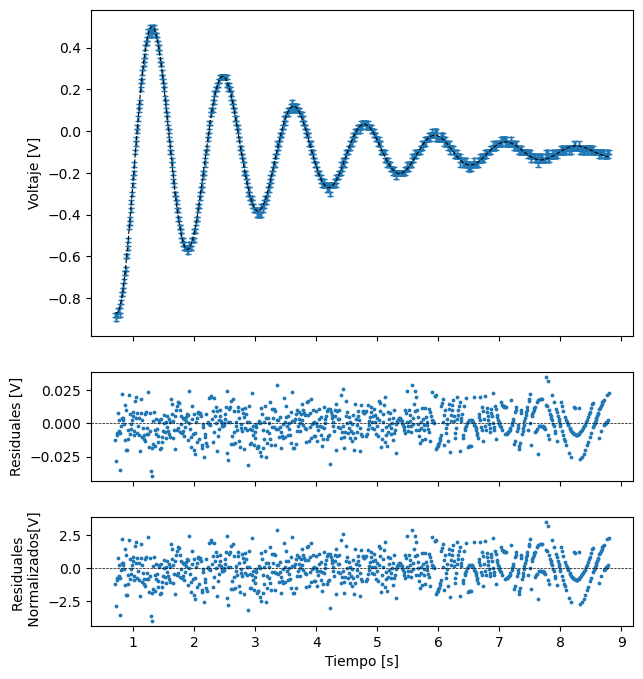

In [38]:
df = pd.read_csv('F0002CH1.csv')

# Extraer las columnas 4 y 5 (ten en cuenta que las columnas en pandas se indexan desde 0)
N = 1620
t = df.iloc[:, 3].to_numpy()[70:-N]  # columna 4
V = df.iloc[:, 4].to_numpy()[70:-N]  # columna 5
res_1, con_1 = curve_fit(ajuste, t, V, p0=[10, 5,5,5,0])
print(res_1)
yi=ajuste(t, *res_1)


perr = np.sqrt(np.diag(con_1))  # Las desviaciones estándar de los parámetros

# Imprimir los resultados
print("Parámetros ajustados:")
print(f"V = {res_1[0]} ± {perr[0]}")
print(f"gamma = {2*res_1[1]} ± {perr[1]}")
print(f"w = {res_1[2]} ± {perr[2]}")
print(f"c = {res_1[3]} ± {perr[3]}")
print(f"d = {res_1[4]} ± {perr[4]}")
print("w0 = ",(res_1[2]**2+ (2*res_1[1])**2/4 )**0.5)
print("gamma/2 = ", res_1[1])

fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})

axs[0].errorbar(t, V,xerr=0.001, yerr=0.01,fmt=" ", markersize = 2,label = "Datos", capsize=2, elinewidth=1,markeredgewidth=1, capthick=0.5)
axs[0].plot(t,yi, linestyle = "--", color= "black", linewidth=0.8 )
plt.xlabel("Tiempo [s]")
axs[0].set_ylabel("Voltaje [V]")
axs[1].set_ylabel("Residuales [V]")
axs[1].scatter(t, V-yi, s = 3)
R =(V-yi)/0.01
axs[2].scatter(t,R , s = 3)
axs[2].set_ylabel("Residuales \n Normalizados[V]")
axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
print("tau = ", 1/(res_1[1]*2))
print("Q = ", (res_1[2]**2+res_1[1]**2)**0.5/(2*res_1[1]) )

In [22]:
N = 1.4

1.9120334022463

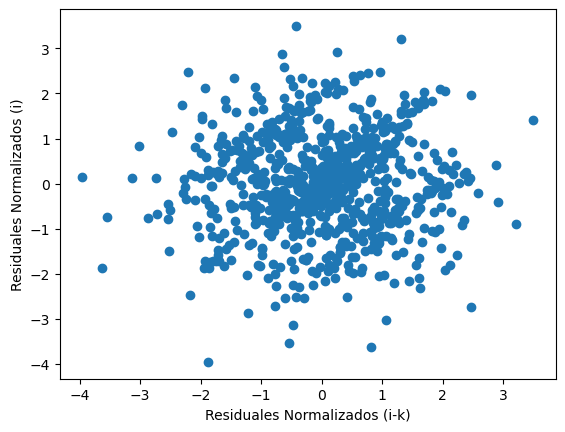

In [23]:
lag_plot1(R)
Durbin_Watson(R)

# Parte 2


para este valor de desplaza a 2.3


212.2 gr


pendiente =  0.063  +/-  0.0015811388300841897
Intercepto =  1.18  +/-  0.007745966692414834
D:  2.0372093023255853


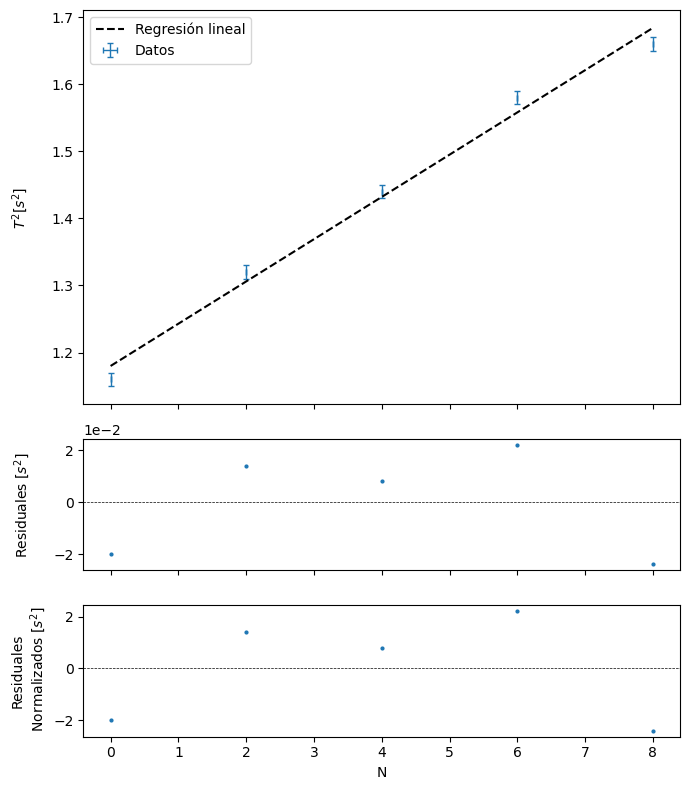

In [24]:
N = np.array([0,2,4,6,8])
periodo = np.array([1.16, 1.32 , 1.44,1.58, 1.66 ]) #s
periodo2 = periodo**2


i = np.zeros(len(N))
t = 0.01*np.ones(len(periodo2))



palabras = [r"$T^2 [s^2]$", r"$[s^2]$", "N"]


m, b, e_b, e_m, R =minimos_cuadrados_incertidumbre_2(N, periodo, i,t , palabras)

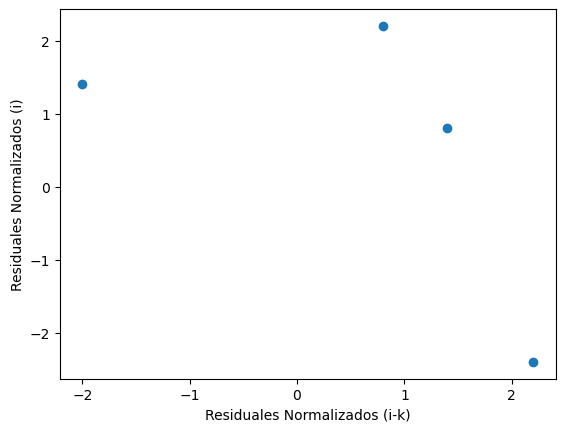

In [25]:
lag_plot1(R)

In [32]:
r = 2.6/2
r1 = 1.8+r

print(r1)
r2 = r+3.8
print(r2)
k = (np.pi**2*280.7/1000*((r1/100)**2+(r2/100)**2))/(2*m)

val = k/(3234*10**-6)*m__


print(b*k*1000/(4*np.pi**2))
print(val)
print(k*1000)

3.1
5.1
2.3409266111111102
13.125238025730628
78.31871045304885


In [67]:
# Datos que faltaron

#2.6




# critico

[ 1.10187946e+02  2.79115733e+00  4.66562456e+00  4.43284188e+00
 -1.15713924e-02]
Parámetros ajustados:
V = 110.18794581259625 ± 2.2272418310131523
gamma = 5.582314664581578 ± 0.011199540865701367
w = 4.665624556695406 ± 0.011332007341507152
c = 4.43284187589645 ± 0.022380150849885743
d = -0.011571392396573638 ± 0.0004156831422952477
w0 =  5.436783217826497
gamma/2 =  2.791157332290789
tau =  0.17913716085278308
Q =  0.9739299098134968


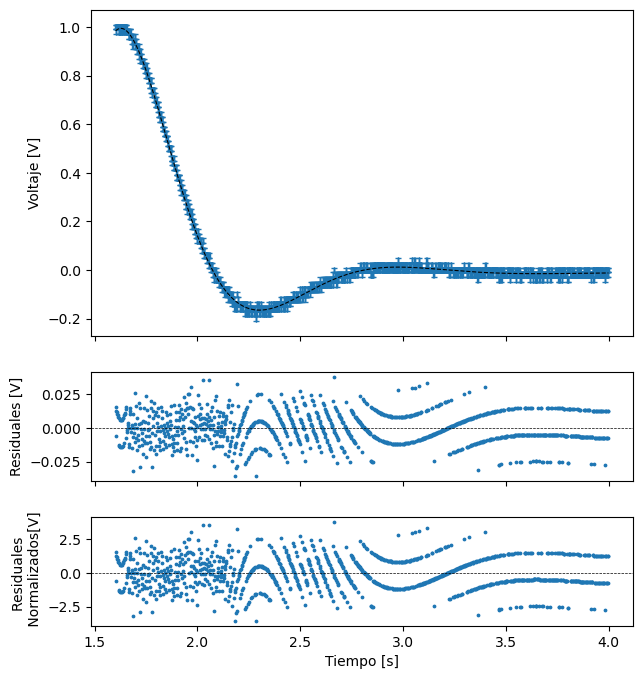

In [37]:
df = pd.read_csv('F0011CH2.csv')

# Extraer las columnas 4 y 5 (ten en cuenta que las columnas en pandas se indexan desde 0)

t = df.iloc[:, 3].to_numpy()[800:-500]  # columna 4
V = df.iloc[:, 4].to_numpy()[800:-500]  # columna 5
V = V-V[-1]
res_1, con_1 = curve_fit(ajuste, t, V, p0=[10, 5,5,5,0])
print(res_1)
yi=ajuste(t, *res_1)


perr = np.sqrt(np.diag(con_1))  # Las desviaciones estándar de los parámetros

# Imprimir los resultados
print("Parámetros ajustados:")
print(f"V = {res_1[0]} ± {perr[0]}")
print(f"gamma = {2*res_1[1]} ± {perr[1]}")
print(f"w = {res_1[2]} ± {perr[2]}")
print(f"c = {res_1[3]} ± {perr[3]}")
print(f"d = {res_1[4]} ± {perr[4]}")

print("w0 = ",(res_1[2]**2+ (2*res_1[1])**2/4 )**0.5)
print("gamma/2 = ", res_1[1])

fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})

axs[0].errorbar(t, V,xerr=0.001, yerr=0.01,fmt=" ", markersize = 2,label = "Datos", capsize=2, elinewidth=1,markeredgewidth=1, capthick=0.5)
axs[0].plot(t,yi, linestyle = "--", color= "black", linewidth=0.8 )
plt.xlabel("Tiempo [s]")
axs[0].set_ylabel("Voltaje [V]")
axs[1].set_ylabel("Residuales [V]")
axs[1].scatter(t, V-yi, s = 3)
R =(V-yi)/0.01
axs[2].scatter(t,R , s = 3)
axs[2].set_ylabel("Residuales \n Normalizados[V]")
axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
print("tau = ", 1/(res_1[1]*2))
print("Q = ", (res_1[2]**2+res_1[1]**2)**0.5/(2*res_1[1]) )



2.0199653383118314

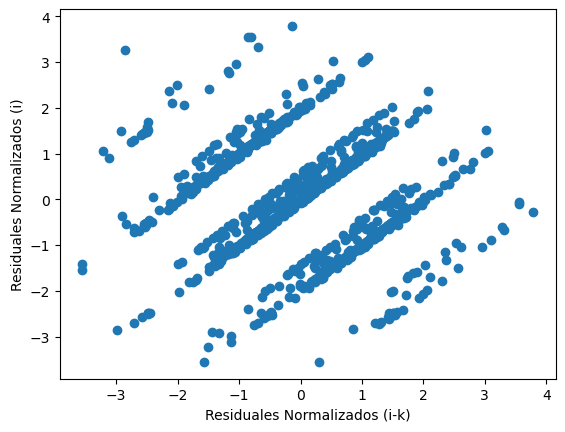

In [69]:
lag_plot1(R)
Durbin_Watson(R)

# Sobreamortiguado

Parámetros ajustados:
V = 515.2244317006807 ± 44634.11814995606
gamma = 2.503294556107966 ± 0.0242429301433032
w = -0.0015484267148441035 ± 0.13409976011239091
c = 29.841374518484024 ± 0.3253729654117291
d = 0.03408476733814355 ± 0.0008368524950525441
w0 =  1.2516482358415384
gamma/2 =  1.251647278053983
tau =  0.3994735647708853
Q =  0.500000382610809


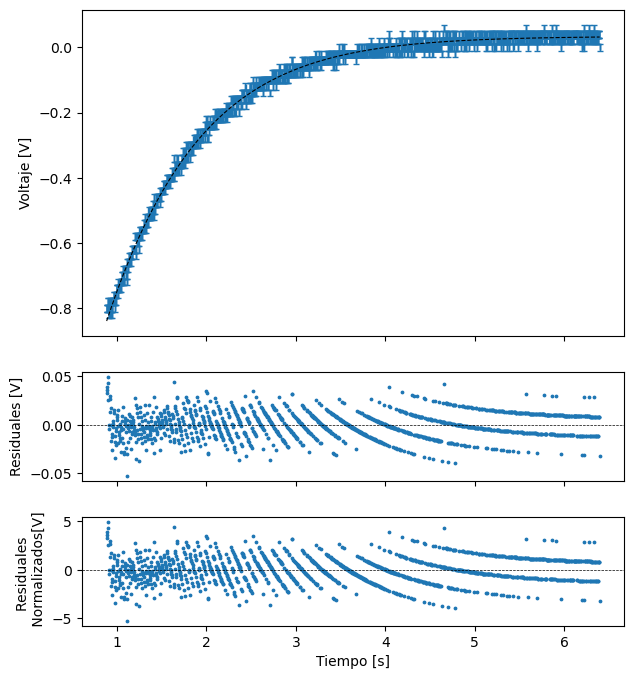

In [40]:
df = pd.read_csv('F0010CH2.csv')

# Extraer las columnas 4 y 5 (ten en cuenta que las columnas en pandas se indexan desde 0)

t = df.iloc[:, 3].to_numpy()[220:-900]  # columna 4
V = df.iloc[:, 4].to_numpy()[220:-900]  # columna 5
V = V-V[-1]


def ajuste(x, V, b, w,c,d):
    return V * np.exp(-b*x) * np.cos(w * x+c)+d

res_1, con_1 = curve_fit(ajuste, t, V, p0=[30,4,10,0,0])
yi=ajuste(t, *res_1)


perr = np.sqrt(np.diag(con_1))  # Las desviaciones estándar de los parámetros

# Imprimir los resultados
print("Parámetros ajustados:")
print(f"V = {res_1[0]} ± {perr[0]}")
print(f"gamma = {2*res_1[1]} ± {perr[1]}")
print(f"w = {res_1[2]} ± {perr[2]}")
print(f"c = {res_1[3]} ± {perr[3]}")
print(f"d = {res_1[4]} ± {perr[4]}")
print("w0 = ",(res_1[2]**2+ (2*res_1[1])**2/4 )**0.5)
print("gamma/2 = ", res_1[1])


fig, axs = plt.subplots(3, 1, figsize=(7, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1,1]})

axs[0].errorbar(t, V,xerr=0.001, yerr=0.01,fmt=" ", markersize = 2,label = "Datos", capsize=2, elinewidth=1,markeredgewidth=1, capthick=0.5)
axs[0].plot(t,yi, linestyle = "--", color= "black", linewidth=0.8 )
plt.xlabel("Tiempo [s]")
axs[0].set_ylabel("Voltaje [V]")
axs[1].set_ylabel("Residuales [V]")
axs[1].scatter(t, V-yi, s = 3)
R =(V-yi)/0.01
axs[2].scatter(t,R , s = 3)
axs[2].set_ylabel("Residuales \n Normalizados[V]")
axs[1].axhline(0, color='black', linestyle='--', linewidth=0.5)
axs[2].axhline(0, color='black', linestyle='--', linewidth=0.5)
print("tau = ", 1/(res_1[1]*2))
print("Q = ", (res_1[2]**2+res_1[1]**2)**0.5/(2*res_1[1]) )

2.0087536924484395

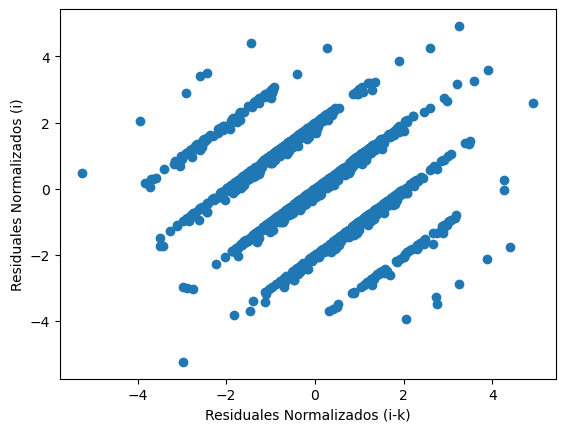

In [123]:
lag_plot1(R)
Durbin_Watson(R)

Funciones